# COGS 108 - Final Project 

# Overview

This project was inspired by a conversation I tend to have relatively often with my family. Both of my parents prefer to eat in "nicer" areas of our hometown and I often criticize them for this since, in my opinion, food is food. To try and see if there was any validity in their stance I analyzed the health inspection performance of restaurants in zip codes with high and low median family incomes. After my analysis, it is clear that there is some difference between restauraunts in these groups but while this difference is statistically significant it is not significant enough to justify only eating at restaurants in "nicer" areas of town.

# Name & GitHub

- Name: Duncan Carlmark
- GitHub Username: DuncanCarlmark

# Research Question

When it comes to public health inspections, is there any difference in the performance of restaurants in high income zip codes versus restaurants in low income zip codes?

## Background and Prior Work


References (include links):
- **1)** https://www.forsyth.cc/PublicHealth/EnvironmentalHealth/aboutInspections.aspx
- **2)** https://foodhandlerscardhelp.com/nc-food-handlers-reqiurements/
- **3)** http://foodsafetytrainingcourses.com/north_carolina_food_safety_training_course.html

- **4)** https://ajph.aphapublications.org/doi/pdf/10.2105/AJPH.2012.300865
- **5)**

- **6)** https://www.healthcare.gov/glossary/federal-poverty-level-fpl/



General Information:

- **1)** Foodservice establishments in North Carolina are inspected at regular intervals depending on an establishments "Risk Category" which is a measure of how easily a resturaunt could harm someone with ill prepared food due to the complexity of their menu and the succeptibility of the population they serve. During an inspection many different aspects of the restaurant are evaluated such as the storage of high risk foods, the storage of chemicals, the conduct of the employees, etc. If the inspector finds any of these aspects to be a violation, they will deduct points from the restaurant's final score. Certain violations are deemed to be critical violations essentailly stating that they are more severe and have a much higher probability of harming a worker or customer of the restaurant. Once an inspection is complete the restauraunt is awarded a grade from 0 - 102 and any restaurant that scores below a 90 can request a re-inspection within 15 days of the original inspection to re-evaluate for a higher score.


- **2)** Those that work in foodservice establishments in North Carolina are not required to be certified food handelers, however every establishment is reqired to have a Certified Food Protection Manager. So while each individual person does not need to have a personal certification, there must be at least one individual who is a CFPM that can oversee and ensure that all food is prepared and stored properly. There are many online resources to receive a standard food handling certification and each charges around $10 for their certification.


- **3)** The food handlers certification lasts up to 5 years but can expire sooner depending on local jurisdicction. This is honestly really interesting since that means someone could not work in a restaurant for 4 years but then rejoin the workforce and the government expects them to remember all the information from their 8 hour training from several years ago.


Prior Work:

- **4)** A study investigating environmental burdens found that low-income neighborhoods had better access to fast food outlets and convenience stores rather than other businesses that would offer better healthier food. While this study does not explicity mention anything about health inspections it does determine that there is a correlation between low income neighborhoods and fast food. The existience of this correlation may explain someones aversion to eating in these environments since fast food is traditionally looked down upon because of its unhealthyness.


- **5)** This study assessed the sanitary knowledge of cooks/chefs from Nigeria. The most significant finding of the study in regards to my hypothesis is that there was a strong correlation between the education of someone and their knowledge of food safety procedures. Those that had attended a cooking school were far more likely to understand how to properly prevent the spread of foodborne illnesses. This would mean that restaurants that could afford to hire those with additional supplementary education on how to handle food would likely have less violations and a higher overall score.


Information for Analysis:
- **6)** The federal poverty levels for families of various sizes. $30,680 is the level for a family of 5.



# Hypothesis


There is no difference in the number of errors made or the overall inspection score of restaurants in lower income zip codes versus restaurants in higher income zip codes.

# Dataset(s)

- **Dataset Name:** inspections.csv
- **Link to the dataset:** https://canvas.ucsd.edu/courses/12630/files/1639871/download?wrap=1
- **Number of observations:** 18466
- **Description:** This dataset contains health inspections in North Carolina from the years 2012 to 2016. Each observation in the dataset is for a specific instance of an inspection as a restuaraunt can be inspected multiple times over the course of 4 years. For each inspection, the data set keeps track of the inspector name, the date of the inspection, the time since the resturaunt opened, the score the restaurant received, the number of critical/noncritical errors/ the revious number of errors, and many other important statistics. The features that are most relevant for my analysis are those that track the inspections over time and those that track the performance of a restaurant over time.


- **Dataset Name:** zipcodes.csv
- **Link to the dataset:** https://canvas.ucsd.edu/courses/12630/files/1639871/download?wrap=1
- **Number of observations:** 38
- **Description:** This data set contains economic and polulation information for zipcodes in North Carolina. This data was presumably collected from the 2010 census and the only section that will be relevant to my analysis is Median Family Income.


I plan to combine these data sets so that I can compare restaurants in zip codes with varying Median Family Incomes. To do this, I will simply merge the two data sets (inspections join zipcodes) with a left join on the 'zip' columns.

# Setup

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import wilcoxon

import warnings
warnings.filterwarnings("ignore")

inspections = pd.read_csv('inspections.csv')
zipcodes = pd.read_csv('zipcodes.csv')


# Data Cleaning

#### Cleaning:
In terms of data cleaning there was not too much work to be done. The inspections file did have some columns that had NA values but these columns were not relevant to my analysis. The zipcode file had no missing data so there was nothing to account for there either.

In the end I ended up removing columns from the dataset that were not relevant to my analysis for simplicity.

#### Preprocessing:
The only preprocessing that was necessary was the joining of the datasets on the 'zip' columns and the removal of facilities that were not relevant to my question. For example, the data has inspections for "Public School Lunchrooms" and it would make no sense to include this in my analysis since I am trying to analyze resturaunts where anyone can eat.

Below is the missing analysis for the inpections file and the zipcode file in which only the columns that have missing values are displayed. The merging of the data sets and the removal of irrelevant features is also included below.

In [165]:
inspections.isna().mean().loc[inspections.isna().mean() > 0]

address2                                 0.897379
phonenumber                              0.027131
description                              0.569479
inspectedby                              0.000271
inspector_id                             0.000271
previous_inspection_date                 0.164898
days_since_previous_inspection           0.164898
previous_inspection_by_same_inspector    0.165223
num_critical_previous                    0.164898
num_non_critical_previous                0.164898
num_critical_mean_previous               0.164898
num_non_critical_mean_previous           0.164898
avg_neighbor_num_critical                0.000325
avg_neighbor_num_non_critical            0.000325
top_match                                0.000325
second_match                             0.000325
dtype: float64

In [166]:
zipcodes.isna().mean().loc[zipcodes.isna().mean() > 0]

Series([], dtype: float64)

In [167]:
merged = inspections.merge(zipcodes, how='left', left_on = 'zip', right_on = 'zip')

# Columns that are irrelevant
dontCare = ['address2', 'phonenumber',  'inspectedby', 'name',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match']
merged = merged.drop(dontCare, axis = 1)

# Observations that do not pertain to my analysis
merged = merged[(merged['facilitytype'] == "Restaurant") |
           (merged['facilitytype'] == "Food Stand") |
           (merged['facilitytype'] == "Mobile Food Units") |
           (merged['facilitytype'] == "Pushcarts")]



# Data Analysis & Results

## EDA

### Variables in Question

The variables that I used in my analysis were

**score:** The score a resturaunt receives on its health inspection

**num_critical:** The number of errors a restaurant receives that could cause serious harm

**num_non_critical:** The number of noncritical errors

**zipcode:** The identifier for a geographic region

**median_family_income_dollars:** The median family income a family receives annualy. The number of members in a family varies

**inspection_num:** The number that corresponds to however many times the restaurant has been inspected prior. Ex: If this observation is the restaurants second health inspection the value of this variable would be 2


The distributions of the most relevant variables analyzed below...




#### Score

The distribution of the overall score is not very normal as there is a long tail that skews the distribution to the left. This distribution does not tell us much other than that the majority of restaurants score in the 90s range on their inspections, but there are still some restaurants that do not perform very well with scores in the 80s range

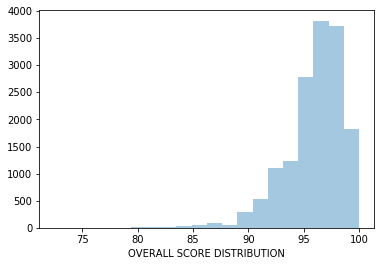

In [168]:
sns.distplot(merged['score'], kde = False, bins = 20, axlabel = 'OVERALL SCORE DISTRIBUTION')


#### Distribution of Scores across zip codes

In this visualization we see the count of zip codes whose average scores are between 90 and 100. While the histogram of the overall distribution of score had a long left tail, this distribution is much more symmetric and bell shaped.

The most interesting thing about this graph is that it seems to be somewhat normal or symmetric. This finding is relatively tangental to my analysis so I won't be delving into this/verifying it, but one could expand on this to define a test that would flag zip codes that lie outside of a 95% CI for this distribution. That is if this distribution is normal...

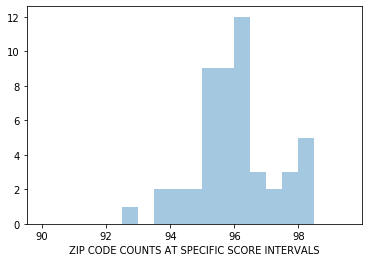

In [169]:
zipIndex = merged.groupby('zip').mean()

bins = np.arange(90, 100, .5)

sns.distplot(zipIndex['score'], kde = False, bins = bins, axlabel = 'ZIP CODE COUNTS AT SPECIFIC SCORE INTERVALS')

#### Median Family Income (Dollars)

The distribution of Median Family Income (MFI) was what I based the rest of my analysis on. As you can see from the density plot below, there is a significant spike in density for MFIs greater than 90,000. I decided to use this difference to separate the two groups for two reasons:

**1)** In case there was any bimodality in the distribution I wanted to account for it

**2)** The goal of my hypothesis is to differentiate between high income and low income zip codes, so since there is a significant change in the distribution at this point, I decided to use 90,000 as my cutoff value for high income zip codes.

There is also a smaller bump on the left tail that is somewhat separated from the rest of the distribution. I also decided to separate this off into a second group, because this portion of the distribution included those that fell under the federal poverty level (for a family of 5).


So from this graph I determined 3 different groups that I would analyze: **rich**, **notRich**, and **poverty**.

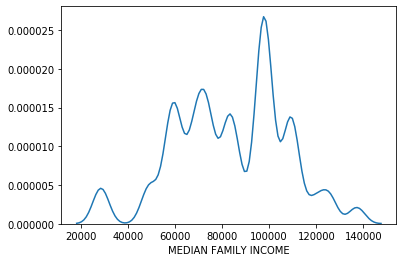

In [170]:
sns.distplot(merged['median_family_income_dollars'], hist=False, axlabel='MEDIAN FAMILY INCOME')

### Outliers

There were no significant outliers in my data that I had to deal with, all fell within the distribution of the data. The closest data I had to an outlier was the tail of the original score distribution. I believe that this tail is part of the distribution and is not a series of random outliers or errors.

## Analysis
For my analysis I focused on the three groups that I had mentioned in the EDA section: rich, notRich, and poverty. I chose these because I believe that they segment the data appropriately. The rich and notRich groups represent the break in the distribution around the 90,000 mark, and the poverty group represents those that lie on the extreme left of the distribution.

In practice I applied each of these categories to observations in the dataset to appropriately create my groups.

In [171]:
# Applies a label column where each value correlates to the MFI for that zip code
def addClass(x):
    if x >= 90000:
        return 'rich'
    elif x < 30680:
        return 'poverty'
    else:
        return 'notRich'
    
merged['class'] = merged['median_family_income_dollars'].apply(addClass)

rich = merged[merged['class'] == 'rich']
notRich = merged[merged['class'] == 'notRich']
poverty = merged[merged['class'] == 'poverty']

Mean Score:
95.95577523413111

 Number Critical Failures:
21193

 Number Non Critical Failures
35792


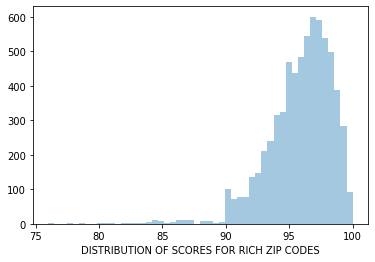

In [172]:
criticalRich = sum(rich['num_critical'])
noncriticalRich = sum(rich['num_non_critical'])
scoreRich = np.mean(rich['score'])

print('Mean Score:')
print(scoreRich)
print('\n Number Critical Failures:')
print(criticalRich)
print('\n Number Non Critical Failures')
print(noncriticalRich)



sns.distplot(rich['score'], kde=False, axlabel= 'DISTRIBUTION OF SCORES FOR RICH ZIP CODES')

Mean Score:
95.94680334829552

 Number Critical Failures:
24717

 Number Non Critical Failures
47050


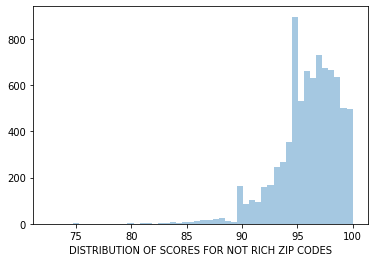

In [173]:
criticalNotRich = sum(notRich['num_critical'])
noncriticalNotRich = sum(notRich['num_non_critical'])
scoreNotRich = np.mean(notRich['score'])

print('Mean Score:')
print(scoreNotRich)
print('\n Number Critical Failures:')
print(criticalNotRich)
print('\n Number Non Critical Failures')
print(noncriticalNotRich)



sns.distplot(notRich['score'], kde=False, axlabel= 'DISTRIBUTION OF SCORES FOR NOT RICH ZIP CODES')

Mean Score:
95.88157894736842

 Number Critical Failures:
1737

 Number Non Critical Failures
2567


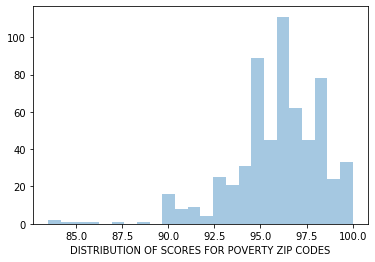

In [174]:
criticalPoverty = sum(poverty['num_critical'])
noncriticalPoverty = sum(poverty['num_non_critical'])
scorePoverty = np.mean(poverty['score'])

print('Mean Score:')
print(scorePoverty)
print('\n Number Critical Failures:')
print(criticalPoverty)
print('\n Number Non Critical Failures')
print(noncriticalPoverty)



sns.distplot(poverty['score'], kde=False, axlabel= 'DISTRIBUTION OF SCORES FOR POVERTY ZIP CODES')

#### Histogram Analysis:

After separating into rich, notRich, and poverty to analyze the distribution of scores, we don't see drastic differences in the shapes of each distribution. All seem relatively normally distributed around a mean of ~95 or 96. However, while the distribution of overall score is similar between all the distributions it doesn't seem that the distribution of critical and noncritical errors follows that same similarity.

In [189]:
propCriticalRich = criticalRich / (criticalRich + noncriticalRich)
propCriticalNotRich = criticalNotRich / (criticalNotRich + noncriticalNotRich)
propCriticalPoverty = criticalPoverty / (criticalPoverty + noncriticalPoverty)

In [193]:
print('Average Critical Errors')
print()
print('Average Rich ')
print(rich['num_critical'].mean())
print('Average NotRich ')
print(notRich['num_critical'].mean())
print('Average Poverty ')
print(poverty['num_critical'].mean())

print()
print('Average NonCritical Errors')
print()
print('Average Rich ')
print(rich['num_non_critical'].mean())
print('Average NotRich ')
print(notRich['num_non_critical'].mean())
print('Average Poverty ')
print(poverty['num_non_critical'].mean())

Average Critical Errors

Average Rich 
3.150438531291809
Average NotRich 
2.99854421933762
Average Poverty 
2.856907894736842

Average NonCritical Errors

Average Rich 
5.320648134383826
Average NotRich 
5.707873347082373
Average Poverty 
4.222039473684211


#### Difference in Errors

By analyzing the number and types of errors made in each group of zip codes we see that there are some visible differences between the groups. We can confirm the significance of these differences using a **Wilcoxon Signed Rank Test** since the distributions of these variables are not normal.

The null and alternate hypothesies for these tests follow as...

H0: mean(x) == mean(y)

H1: mean(x) != mean(y)


##### Rich v notRich : Critical

In [200]:
d = rich['num_critical'] - notRich['num_critical']
w, p = wilcoxon(d)
print('P VALUE: ', p)

P VALUE:  0.0


##### Rich v Poverty: Critical

In [201]:
d = rich['num_critical'] - poverty['num_critical']
w, p = wilcoxon(d)
print('P VALUE: ', p)

P VALUE:  0.0


##### Rich v notRich : Noncritical

In [202]:
d = rich['num_non_critical'] - notRich['num_non_critical']
w, p = wilcoxon(d)
print('P VALUE: ', p)

P VALUE:  0.0


##### Rich v Poverty : Noncritical

In [203]:
d = rich['num_non_critical'] - poverty['num_non_critical']
w, p = wilcoxon(d)
print('P VALUE: ', p)

P VALUE:  0.0


#### Wilcoxon Analysis

From this we can see that there is a statistically significant difference between the distributions of errors made in zip codes with higher MFIs than zip codes with lower MFIs as all of our tests returned significant P values for both critical and noncritical errors. This provides a more nuanced view than our previous general analysis of overall score.

#### Improvement over Time

The final portion of analysis has to do with the improvement of restaurants over time. How well a restaurant improves will be determined by how much they minimize their critical and noncritical errors over time. The analysis will still be carried out for all three groups to determine if any stand out in their handling of errors over time.


Time in this analysis is also measured by inspection number, so rather than organizing the x axis by dates it is organized by what number each individual inspection was in the lifetime of that restaurant.

##### Improvement of Average Critical Errors Across 10 Inspections

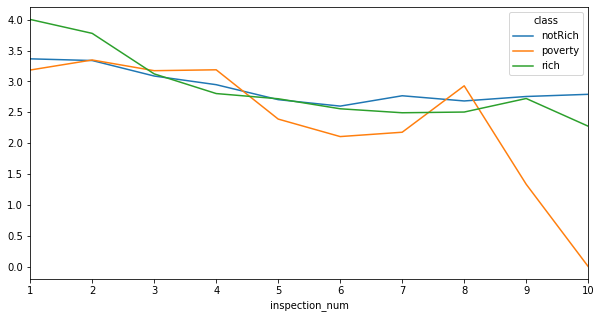

In [204]:
analysis = pd.pivot_table(merged, index = 'class', columns = 'inspection_num', values = 'num_critical')
analysis.transpose().drop(range(11, 17)).plot.line(figsize = (10,5))

##### Improvement of Average Noncritical Errors Across 10 Inspections

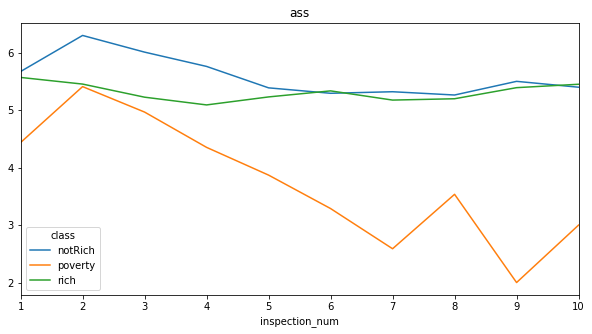

In [211]:
analysis = pd.pivot_table(merged, index = 'class', columns = 'inspection_num', values = 'num_non_critical')
analysis.transpose().drop(range(11, 17)).plot.line(figsize = (10,5), title='ass', )

#### Improvement Over Time Results

As a disclaimer, the changes of the Poverty group are more sporadic as there are less observations in the data for restaurants from low income zipcodes that have had more than 6 inspections.

While low income zip codes vary above and below better off zip codes in number of critical errors over time, there is no major difference between the groups and all have a downward trend as time goes on. This is as expected since over time restaurants should be correcting critical mistakes they are making to better protect their customers and their ratings.

There is a much more significant difference in the second plot displaying noncritical improvement over time. Poverty zip codes show much better improvement over time than either of the other two groups. Granted some of the increased decreases after 6 inspections could be attributed to the lower availability of data for thes restaurants, but the general downward trend is much more negative than rich and notRich.

# Ethics & Privacy

**Privacy**

In terms of privacy there is not a significant amount of issues that need to be dealth with. The only information one could use to identify someone is the column which specifies which health inspector was responsible for each health inspection. Since this was not relevant to my analysis, I dropped the column and would remove it from the data all together (only keeping the inspector ID) if I were to make my results public. Phone numbers for these businesses are also public, they are not of any significant concern.

**Ethics**

My main ethical concern in this project was trying not to discriminate against any restaurants based on the economic status of their zip code. I wanted to take a neutral stance and investigate if there was any truth to any of the biases society has against communities of lower incomes instead of simply replicating what already exists. 

# Conclusion & Discussion

Recent events and conversations with family members of mine caused me to question if there was any validity to the bias some individuals have against restaurants in lower income communities. To evaluate this appropriately, I hypothesized that there was no difference in health inspection performance between restauraunts in communities with high Median Family Incomes and restaurants in communities with low Median Family Incomes, with performance being the overall score of a restaurant as well as the numbe of critical and noncritical errors that restaurant makes.


The results of my analysis show that while there is no significant difference between the average scores of restaurants in low, medium, and high income communities, there are differences in the number of errors restaurants in those communities make and how those restaurants improve errors over time. Restaurants in low income communities on average make less critical and noncritical errors than restaurants in medium income communities, and restaurants in medium income communitites on average make less critical and noncritical errors as those in high income communities. Finally, while communities of all incomes show similar improvement of critical errors over time, low income communities show much faster rates of improvement when it comes to improving noncritical errors. Given these results I would reject my hypothesis that there is no difference between the health inspection perfromance of restaurants in low income zip codes versus restaurants in high income zip codes.


From these results, we can see that there should be no obvious aversion to restaurants in low income communities. If anything consumers should seek out restaurants in low income communities for their lower average critical and noncritical error rates. I believe that this conclusion is especially important in the context of today's current social and political climate as many Americans are finally confronting the biases held agains POC and those that live in low income communities. These individuals continue to get by with significantly less financial opportunities, but can continue to out perform those society deems "better" than them. While restaurant preference may not seem like it relates to these struggles, it does! The simple aversion to these restaurants takes money out of these communities pockets and we should be correcting these biases to help benefit these struggling communities. 